# Importation et exploration des données

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/remijul/dataset/master/dolphins.csv"
df = pd.read_csv(url)
df.head()

,variety,area,dimension_1_mm,dimension_2_mm,dimension_3_mm,mass_g,sex
0,Tropicalis,Artic,39.1,18.7,181.0,3750.0,MALE
1,Tropicalis,Artic,39.5,17.4,186.0,3800.0,FEMALE
2,Tropicalis,Artic,40.3,18.0,195.0,3250.0,FEMALE
3,Tropicalis,Artic,NaN,NaN,NaN,NaN,NaN
4,Tropicalis,Artic,36.7,19.3,193.0,3450.0,FEMALE


In [2]:
df.shape

(344, 7)

## La cible à prédire est variété. C'est une classification

### Il y a 3 colonnes catégories et 3 colonnes numériques. Pipeline à appliquer 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   variety         344 non-null    object 
 1   area            344 non-null    object 
 2   dimension_1_mm  342 non-null    float64
 3   dimension_2_mm  342 non-null    float64
 4   dimension_3_mm  342 non-null    float64
 5   mass_g          342 non-null    float64
 6   sex             334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
df.value_counts()

variety     area       dimension_1_mm  dimension_2_mm  dimension_3_mm  mass_g  sex   
Chinensis   Pacific    40.9            16.6            187.0           3200.0  FEMALE    1
Tropicalis  Artic      42.8            18.5            195.0           4250.0  MALE      1
                       42.1            19.1            195.0           4000.0  MALE      1
                       41.8            19.4            198.0           4450.0  MALE      1
                       41.5            18.3            195.0           4300.0  MALE      1
                                                                                        ..
Peale       Caraibean  46.2            14.5            209.0           4800.0  FEMALE    1
                                       14.1            217.0           4375.0  FEMALE    1
                       46.1            15.1            215.0           5100.0  MALE      1
                                       13.2            211.0           4500.0  FEMALE    1
Trop

### Jeu des données est déséquilibré. Statégie stratify à appliquer pour train_test_split

In [5]:
df['variety'].value_counts()

Tropicalis    152
Peale         124
Chinensis      68
Name: variety, dtype: int64

### Vérification des valeurs manquantes

In [6]:
df.isna().sum()

variety            0
area               0
dimension_1_mm     2
dimension_2_mm     2
dimension_3_mm     2
mass_g             2
sex               10
dtype: int64

### Vérification des valeurs manquantes de la colonne Sex

In [7]:
df[df['sex'].isna()]

,variety,area,dimension_1_mm,dimension_2_mm,dimension_3_mm,mass_g,sex
3,Tropicalis,Artic,NaN,NaN,NaN,NaN,NaN
8,Tropicalis,Artic,34.1,18.1,193.0,3475.0,NaN
9,Tropicalis,Artic,42.0,20.2,190.0,4250.0,NaN
10,Tropicalis,Artic,37.8,17.1,186.0,3300.0,NaN
11,Tropicalis,Artic,37.8,17.3,180.0,3700.0,NaN
47,Tropicalis,Pacific,37.5,18.9,179.0,2975.0,NaN
246,Peale,Caraibean,44.5,14.3,216.0,4100.0,NaN
286,Peale,Caraibean,46.2,14.4,214.0,4650.0,NaN
324,Peale,Caraibean,47.3,13.8,216.0,4725.0,NaN
339,Peale,Caraibean,NaN,NaN,NaN,NaN,NaN


### Suppression des lignes inutiles

In [8]:
df=df.dropna(subset=['dimension_1_mm', 'dimension_2_mm', 'dimension_3_mm'], how='all')
df.isna().sum()

variety           0
area              0
dimension_1_mm    0
dimension_2_mm    0
dimension_3_mm    0
mass_g            0
sex               8
dtype: int64

### Re-vérification des valeurs manquantes de la colonne Sex

In [9]:
df[df['sex'].isna()]

,variety,area,dimension_1_mm,dimension_2_mm,dimension_3_mm,mass_g,sex
8,Tropicalis,Artic,34.1,18.1,193.0,3475.0,NaN
9,Tropicalis,Artic,42.0,20.2,190.0,4250.0,NaN
10,Tropicalis,Artic,37.8,17.1,186.0,3300.0,NaN
11,Tropicalis,Artic,37.8,17.3,180.0,3700.0,NaN
47,Tropicalis,Pacific,37.5,18.9,179.0,2975.0,NaN
246,Peale,Caraibean,44.5,14.3,216.0,4100.0,NaN
286,Peale,Caraibean,46.2,14.4,214.0,4650.0,NaN
324,Peale,Caraibean,47.3,13.8,216.0,4725.0,NaN


In [10]:
df['sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

### Remplacement de la ligne avec un point dans la colonne sex

In [11]:
df[(df.sex=='.')]

,variety,area,dimension_1_mm,dimension_2_mm,dimension_3_mm,mass_g,sex
336,Peale,Caraibean,44.5,15.7,217.0,4875.0,.


In [12]:
df['sex'] = df['sex'].replace({'.':None})

### 9 valeurs manquantes au lieu de 8

In [13]:
df.isna().sum()

variety           0
area              0
dimension_1_mm    0
dimension_2_mm    0
dimension_3_mm    0
mass_g            0
sex               9
dtype: int64

### Les femelles sont moins massives que les mâles

In [14]:
df.groupby(['variety', 'sex']).mean().round(2)

dimension_1_mm  dimension_2_mm  dimension_3_mm   mass_g
variety    sex                                                            
Chinensis  FEMALE           46.57           17.59          191.74  3527.21
           MALE             51.09           19.25          199.91  3938.97
Peale      FEMALE           45.56           14.24          212.71  4679.74
           MALE             49.47           15.72          221.54  5484.84
Tropicalis FEMALE           37.26           17.62          187.79  3368.84
           MALE             40.39           19.07          192.41  4043.49

### Remplacement des valeurs manquantes de la colonne sex en fonction du contenu des colonnes : variety, area

In [15]:
from random import choice
df['sex'] = df['sex'].fillna(df.groupby(['variety', 
                                         'area'])['sex'].transform(lambda x:choice(x.mode())))

In [16]:
df['sex'].value_counts()

MALE      173
FEMALE    169
Name: sex, dtype: int64

In [17]:
df.isna().sum()

variety           0
area              0
dimension_1_mm    0
dimension_2_mm    0
dimension_3_mm    0
mass_g            0
sex               0
dtype: int64

### Imputation des valeurs manquantes est correcte dans l'ensemble

In [18]:
df.groupby(['variety', 'sex']).mean().round(2)

dimension_1_mm  dimension_2_mm  dimension_3_mm   mass_g
variety    sex                                                            
Chinensis  FEMALE           46.57           17.59          191.74  3527.21
           MALE             51.09           19.25          199.91  3938.97
Peale      FEMALE           45.56           14.24          212.71  4679.74
           MALE             49.24           15.65          221.18  5429.62
Tropicalis FEMALE           37.29           17.65          187.77  3385.06
           MALE             40.35           19.07          192.23  4029.05

### Petit écart autour de la moyenne pour 3 dimensions

In [19]:
df.describe()

,dimension_1_mm,dimension_2_mm,dimension_3_mm,mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


# Machine Learning

## Importation des bibliothèques

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

### Transformer la cible en valeurs numériques

In [34]:
y = LabelEncoder().fit_transform(df['variety'])
X = df.drop(columns='variety')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Transformer les features

In [35]:
column_cat = ['area', 'sex']
transfo_cat = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

column_num = ['dimension_1_mm', 'dimension_2_mm', 'dimension_3_mm', 'mass_g']
transfo_num = Pipeline(steps=[('scaling', StandardScaler())])

In [36]:
preparation = ColumnTransformer(
    transformers=[
        ('data_cat', transfo_cat , column_cat),
        ('data_num', transfo_num , column_num)
    ])

In [37]:
preparation

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('data_cat',
                                 Pipeline(memory=None,
                                          steps=[('onehot',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='ignore',
                                                                sparse=True))],
                                          verbose=False),
                                 ['area', 'sex']),
                                ('data_num',
                                 Pipeline(memory=None,
                                          steps=[('scaling',
                                 

In [38]:
cv = RepeatedKFold(n_splits=10, n_repeats=3)

In [39]:
svm= SVC()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
lr=LogisticRegression()

## Les hyperparamètres de la régression logistique et GridSearchCV

In [43]:
pipe = Pipeline(steps=[('preparation', preparation),('model',lr)])

In [44]:
print(pipe.get_params().keys())

dict_keys(['memory', 'steps', 'verbose', 'preparation', 'model', 'preparation__n_jobs', 'preparation__remainder', 'preparation__sparse_threshold', 'preparation__transformer_weights', 'preparation__transformers', 'preparation__verbose', 'preparation__data_cat', 'preparation__data_num', 'preparation__data_cat__memory', 'preparation__data_cat__steps', 'preparation__data_cat__verbose', 'preparation__data_cat__onehot', 'preparation__data_cat__onehot__categories', 'preparation__data_cat__onehot__drop', 'preparation__data_cat__onehot__dtype', 'preparation__data_cat__onehot__handle_unknown', 'preparation__data_cat__onehot__sparse', 'preparation__data_num__memory', 'preparation__data_num__steps', 'preparation__data_num__verbose', 'preparation__data_num__scaling', 'preparation__data_num__scaling__copy', 'preparation__data_num__scaling__with_mean', 'preparation__data_num__scaling__with_std', 'model__C', 'model__class_weight', 'model__dual', 'model__fit_intercept', 'model__intercept_scaling', 'mod

In [45]:
parameters = {'model__solver':('newton-cg', 'lbfgs', 'liblinear'),
              'model__penalty':('none', 'l1', 'l2', 'elasticnet')}

In [46]:
grid = GridSearchCV(pipe, parameters, cv = cv)
grid.fit(X_train, y_train)
print('Le meilleur score:', round(grid.best_score_, 2))
print('Les meilleurs paramètres:', grid.best_params_)

Le meilleur score: 1.0
Les meilleurs paramètres: {'model__penalty': 'l1', 'model__solver': 'liblinear'}


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        30

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69

Coefficient de determination : 1.0


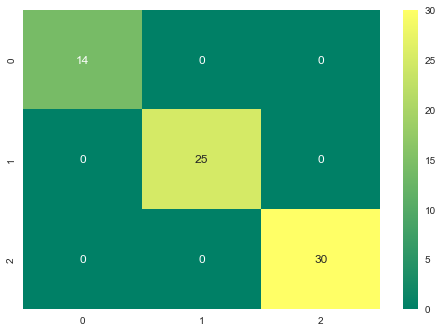

In [48]:
y_pred = grid.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Coefficient de determination :", round(metrics.r2_score(y_test, y_pred), 2))
cm = metrics.confusion_matrix(y_test, y_pred)
f = sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.summer)

# Conclusion: Pas de faux positifs et négatifs